<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/dnit_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot 
import statsmodels.formula.api as sm
#**************************************

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
base=pd.read_csv('contagem_de_trafego_cgplan.csv',error_bad_lines=False, sep=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(base)

6769

In [ ]:
base

,ID,id_trecho_,vl_br,sg_uf,nm_tipo_tr,sg_tipo_tr,desc_coinc,vl_codigo,ds_local_i,ds_local_f,...,E_D,F_D,G_D,H_D,I_D,J_D,VMDa_C,VMDa_D,NS_C,NS_D
0,4317,155030,307,AC,Eixo Principal,B,-,307BAC0005,ENTR AC-190/378 (MARECHAL TAUMATURGO),ENTR AC-090 (PORTO VALTER),...,-,-,-,-,-,-,-,-,-,-
1,4318,155031,307,AC,Eixo Principal,B,-,307BAC0010,ENTR AC-090 (PORTO VALTER),INÍCIO TRECHO IMPLANTADO,...,-,-,-,-,-,-,-,-,-,-
2,4319,158261,307,AC,Eixo Principal,B,-,307BAC0015,INÍCIO TRECHO IMPLANTADO,ENTR RAMAL 03,...,-,-,-,-,-,-,-,-,-,-
3,4320,158260,307,AC,Eixo Principal,B,-,307BAC0018,ENTR RAMAL 03,INÍCIO TRECHO PAVIMENTADO,...,-,-,-,-,-,-,-,-,-,-
4,4321,158259,307,AC,Eixo Principal,B,-,307BAC0020,INÍCIO TRECHO PAVIMENTADO,ENTR BR-364(A),...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,3434,160957,242,TO,Eixo Principal,B,-,242BTO0500,ENTR AV. JOAQUIM BATISTA DE OLIVEIRA (FORMOSO ...,ENTR TO-070 (FORMOSO DO ARAGUAIA),...,6,4,0,0,344,43,569,547,A,A
6765,3435,154198,242,TO,Eixo Principal,B,-,242BTO0510,ENTR TO-070 (FORMOSO DO ARAGUAIA),ENTR TO-181(A),...,-,-,-,-,-,-,-,-,-,-
6766,3436,154199,242,TO,Eixo Principal,B,-,242BTO0512,ENTR TO-181(A),ENTR TO-181(B),...,-,-,-,-,-,-,-,-,-,-
6767,3437,154200,242,TO,Eixo Principal,B,-,242BTO0520,ENTR TO-181(B),PORTO PIAUÍ (RIO JAVAÉS),...,-,-,-,-,-,-,-,-,-,-


In [ ]:
#transf variavel categorica em númerica


In [ ]:
#Tratando dados, primeiro verificar NaN nos id's
idAgrupado=base.groupby(['ID']).size()
idAgrupado

ID
1       1
2       1
3       1
4       1
5       1
       ..
7606    1
7607    1
7608    1
7609    1
7610    1
Length: 6769, dtype: int64

In [ ]:
#verficar se há estados duplicados ou inexistentes
ufAgrupado=base.groupby(['sg_uf']).describe()
ufAgrupado

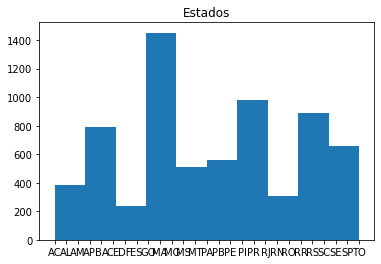

<Figure size 3600x3456 with 0 Axes>

In [ ]:
#histograma relacionando os estados, o estado de Minas Gerais apresenta maior intensidade no trafego
histogramaUF=plt.hist(base['sg_uf'])
histogramaUF=plt.title("Estados")
histogramaUF=plt.figure( figsize=(50, 48))
histogramaUF=plt.gcf().set_size_inches(50, 48)
histogramaUF

In [ ]:
#distplot dos estados
#bpUF=srn.distplot(base['vl_km_i_estim']).set_title("Estimativa de km's rodados por trecho ")
#bpUF

In [ ]:
#verificar duplicações nos vl_codigo , ao todo 432 duplicados, ou seja a recorrência em 432 vias
duplicados=base.duplicated(['vl_codigo']).sum()
duplicados

432

In [ ]:
#histograma do tipo do trecho em cada estado, vias de eixo principal são a maioria esmagadora dos tipos analisados,
#uma vez que estamos tratando de trafego rodoviário
histogramaTipo=plt.hist(base['nm_tipo_tr'])
histogramaTipo=plt.title("Tipo do trecho por estado")
histogramaTipo=plt.figure( figsize=(50, 48))
histogramaTipo=plt.gcf().set_size_inches(50, 48)
histogramaTipo

In [ ]:
#na sequencia um boxplot relacionado aos em cada local
bpLocais=sns.boxplot(base['id_trecho_']).set_title("Boxplot dos locais com maior incidência de trafego ")

Text(0.5, 1.0, 'Estados')

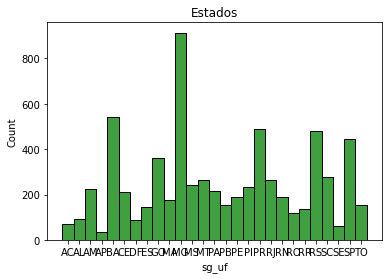

In [ ]:
#histograma com linha de distribuição de frequencia por estados:
sns.histplot(base.iloc[:,3],kde=False,bins=15,color='green').set_title('Estados')

In [ ]:

sns.histplot(base.iloc[:,4],kde=False,bins=10,color='green').set_title('Vias de trafego')

In [ ]:
#regressao linear simples: trecho por via
#dia Feb/19, troca das variaveis , id passa a ser indep e trecho indep
variavelI=base.iloc[:,0].values
variavelT=base.iloc[:,2].values

In [ ]:
#construção da correlacao: 0.87 , alteracao da var y (22/02) aumentou correlacao
correlacao=np.corrcoef(variavelI,variavelT)
correlacao

array([[1.        , 0.87506564],
       [0.87506564, 1.        ]])

In [ ]:
variavelI= variavelI.reshape(-1,1)#transformando variavel independente(trecho) em matriz de linha única para o modelo de regressao
modeloIT=LinearRegression()

In [ ]:
#ajuste do modelo
modeloIT.fit(variavelI,variavelT)

LinearRegression()

In [ ]:
#vizualizar interceptacoes das var's
modeloIT.intercept_

52.7754482942255

In [ ]:
#coefcientes, mostrando uma interpretação moderada de 52,98 % devido alteracao de y
modeloIT.coef_

array([0.05298288])

In [ ]:
#gráfico , após alteração da variavel y, esse modelo apresenta melhor tradução , porém outliers AINDA precisam ser tratados(22/02)
plt.scatter(variavelI,variavelT)
plt.plot(variavelI,modeloIT.predict(variavelI),color='red')

In [ ]:
#previsão para um determinado trecho aleatorio
modeloIT.intercept_ + modeloIT.coef_ *50

array([55.42459207])

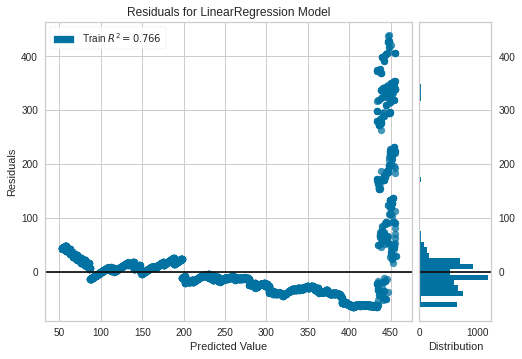

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Gráfico para visualizar os residuais, residuais apresentam tendencia , distribuição se aproxima de um distribuição normal
visualizador = ResidualsPlot(modeloIT)
visualizador.fit(variavelI,variavelT)
visualizador.poof()